In [29]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


df = pd.read_csv(r'C:\Users\radia\OneDrive\Desktop\Data Analytic Portfolio Projects\Traffic_Incidents_1.csv')

In [7]:
df.head()

,INCIDENT INFO,DESCRIPTION,START_DT,START_TIME,TIME_CATEGORY,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
0,9 Avenue and 16 Street SE,Traffic incident.,6/20/2022 17:15,17:15,Afternoon,6/20/2022 17:39,SE,-114.022138,51.036431,1,2022-06-20T17:15:5451.036430994532274-114.0221...,POINT (-114.02213851894481 51.036430994532274)
1,Northbound 14 Street and Memorial Drive NW,Traffic incident.,6/20/2022 17:37,17:37,Afternoon,6/20/2022 17:43,NW,-114.095939,51.049265,1,2022-06-20T17:37:5951.0492648619755-114.095938...,POINT (-114.09593875517233 51.0492648619755)
2,Southbound Deerfoot Trail and McKnight Boulev...,Two vehicle incident. Blocking the right lane,7/14/2022 14:08,14:08,Afternoon,7/14/2022 14:10,NW,-114.040891,51.096075,1,2022-07-14T14:08:1451.09607502612179-114.04089...,POINT (-114.04089121959574 51.09607502612179)
3,Westbound Country Hills Boulevard and Citadel...,Traffic incident.,7/14/2022 13:39,13:39,Afternoon,7/14/2022 14:39,NW,-114.172163,51.137425,1,2022-07-14T13:39:3651.13742477249295-114.17216...,POINT (-114.17216288422048 51.13742477249295)
4,130 Avenue and Tsuut'ina Trail SW,Traffic incident.,6/20/2022 17:27,17:27,Afternoon,6/20/2022 18:05,SW,-114.139663,50.936225,1,2022-06-20T17:27:4050.93622497228735-114.13966...,POINT (-114.13966287801772 50.93622497228735)


In [30]:
# Clean the data

# Check for missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print ('{} - {}%'.format(col, pct_missing))



INCIDENT INFO - 0.0%
DESCRIPTION - 8.825606024947047e-05%
START_DT - 0.0%
START_TIME - 0.0%
TIME_CATEGORY - 0.0%
MODIFIED_DT - 0.41353847964226875%
QUADRANT - 0.4135973170157684%
Longitude - 0.0%
Latitude - 0.0%
Count - 0.0%
id - 0.0%
Point - 0.0%


In [31]:
# Replace blanks/Null values with "undefined"


df = df.fillna('Undefined')

In [32]:
df

,INCIDENT INFO,DESCRIPTION,START_DT,START_TIME,TIME_CATEGORY,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point
0,9 Avenue and 16 Street SE,Traffic incident.,6/20/2022 17:15,17:15,Afternoon,6/20/2022 17:39,SE,-114.022138,51.036431,1,2022-06-20T17:15:5451.036430994532274-114.0221...,POINT (-114.02213851894481 51.036430994532274)
1,Northbound 14 Street and Memorial Drive NW,Traffic incident.,6/20/2022 17:37,17:37,Afternoon,6/20/2022 17:43,NW,-114.095939,51.049265,1,2022-06-20T17:37:5951.0492648619755-114.095938...,POINT (-114.09593875517233 51.0492648619755)
2,Southbound Deerfoot Trail and McKnight Boulev...,Two vehicle incident. Blocking the right lane,7/14/2022 14:08,14:08,Afternoon,7/14/2022 14:10,NW,-114.040891,51.096075,1,2022-07-14T14:08:1451.09607502612179-114.04089...,POINT (-114.04089121959574 51.09607502612179)
3,Westbound Country Hills Boulevard and Citadel...,Traffic incident.,7/14/2022 13:39,13:39,Afternoon,7/14/2022 14:39,NW,-114.172163,51.137425,1,2022-07-14T13:39:3651.13742477249295-114.17216...,POINT (-114.17216288422048 51.13742477249295)
4,130 Avenue and Tsuut'ina Trail SW,Traffic incident.,6/20/2022 17:27,17:27,Afternoon,6/20/2022 18:05,SW,-114.139663,50.936225,1,2022-06-20T17:27:4050.93622497228735-114.13966...,POINT (-114.13966287801772 50.93622497228735)
...,...,...,...,...,...,...,...,...,...,...,...,...
33987,24 Avenue and McLaurin Street NW,Traffic signals are flashing red. Crews have b...,1/20/2020 9:38,9:38,Morning,Undefined,Undefined,-114.144539,51.074004,1,2020-01-20T09:38:0151.07400444955413-114.14453...,POINT (-114.1445387 51.07400445)
33988,Southland Drive and 24 Street SW,Traffic incident.,2/21/2021 12:24,12:24,Afternoon,Undefined,Undefined,-114.118531,50.961362,1,2021-02-21T12:24:0350.961362475800584-114.1185...,POINT (-114.1185313 50.96136248)
33989,52 Street and McKnight Boulevard NE,Two vehicle incident. Blocking the right lane,9/25/2020 16:22,16:22,Afternoon,Undefined,Undefined,-113.958265,51.096204,1,2020-09-25T16:22:5151.09620390924091-113.95826...,POINT (-113.9582648 51.09620391)
33990,Eastbound 16 Avenue and 36 Street NE,Traffic incident. Blocking the left shoulder,6/20/2022 16:43,16:43,Afternoon,6/20/2022 17:17,NE,-113.989219,51.067086,1,2022-06-20T16:43:2151.06708565896752-113.98921...,POINT (-113.98921905311566 51.06708565896752)


In [33]:
# Convert'START_DT' column to datetime format to extract date and time from it.


df['START_DT'] = pd.to_datetime(df['START_DT'])

df['DATE'] = df['START_DT'].dt.date

df['TIME'] = df['START_DT'].dt.time

In [35]:
# drop an irrelevant column

df.drop('START_TIME', inplace=True, axis=1)

# this error is showing because I was trying to run the above code after I had already removed the column 'START_TIME'

In [36]:
df

,INCIDENT INFO,DESCRIPTION,START_DT,TIME_CATEGORY,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,DATE,TIME
0,9 Avenue and 16 Street SE,Traffic incident.,2022-06-20 17:15:00,Afternoon,6/20/2022 17:39,SE,-114.022138,51.036431,1,2022-06-20T17:15:5451.036430994532274-114.0221...,POINT (-114.02213851894481 51.036430994532274),2022-06-20,17:15:00
1,Northbound 14 Street and Memorial Drive NW,Traffic incident.,2022-06-20 17:37:00,Afternoon,6/20/2022 17:43,NW,-114.095939,51.049265,1,2022-06-20T17:37:5951.0492648619755-114.095938...,POINT (-114.09593875517233 51.0492648619755),2022-06-20,17:37:00
2,Southbound Deerfoot Trail and McKnight Boulev...,Two vehicle incident. Blocking the right lane,2022-07-14 14:08:00,Afternoon,7/14/2022 14:10,NW,-114.040891,51.096075,1,2022-07-14T14:08:1451.09607502612179-114.04089...,POINT (-114.04089121959574 51.09607502612179),2022-07-14,14:08:00
3,Westbound Country Hills Boulevard and Citadel...,Traffic incident.,2022-07-14 13:39:00,Afternoon,7/14/2022 14:39,NW,-114.172163,51.137425,1,2022-07-14T13:39:3651.13742477249295-114.17216...,POINT (-114.17216288422048 51.13742477249295),2022-07-14,13:39:00
4,130 Avenue and Tsuut'ina Trail SW,Traffic incident.,2022-06-20 17:27:00,Afternoon,6/20/2022 18:05,SW,-114.139663,50.936225,1,2022-06-20T17:27:4050.93622497228735-114.13966...,POINT (-114.13966287801772 50.93622497228735),2022-06-20,17:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33987,24 Avenue and McLaurin Street NW,Traffic signals are flashing red. Crews have b...,2020-01-20 09:38:00,Morning,Undefined,Undefined,-114.144539,51.074004,1,2020-01-20T09:38:0151.07400444955413-114.14453...,POINT (-114.1445387 51.07400445),2020-01-20,09:38:00
33988,Southland Drive and 24 Street SW,Traffic incident.,2021-02-21 12:24:00,Afternoon,Undefined,Undefined,-114.118531,50.961362,1,2021-02-21T12:24:0350.961362475800584-114.1185...,POINT (-114.1185313 50.96136248),2021-02-21,12:24:00
33989,52 Street and McKnight Boulevard NE,Two vehicle incident. Blocking the right lane,2020-09-25 16:22:00,Afternoon,Undefined,Undefined,-113.958265,51.096204,1,2020-09-25T16:22:5151.09620390924091-113.95826...,POINT (-113.9582648 51.09620391),2020-09-25,16:22:00
33990,Eastbound 16 Avenue and 36 Street NE,Traffic incident. Blocking the left shoulder,2022-06-20 16:43:00,Afternoon,6/20/2022 17:17,NE,-113.989219,51.067086,1,2022-06-20T16:43:2151.06708565896752-113.98921...,POINT (-113.98921905311566 51.06708565896752),2022-06-20,16:43:00


In [22]:
df.drop('time', inplace=True, axis=1)

In [24]:
df.drop('date', inplace=True, axis=1)

In [35]:
df.head()

,INCIDENT INFO,DESCRIPTION,START_DT,TIME_CATEGORY,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,DATE,TIME
0,9 Avenue and 16 Street SE,Traffic incident.,2022-06-20 17:15:00,Afternoon,6/20/2022 17:39,SE,-114.022138,51.036431,1,2022-06-20T17:15:5451.036430994532274-114.0221...,POINT (-114.02213851894481 51.036430994532274),2022-06-20,17:15:00
1,Northbound 14 Street and Memorial Drive NW,Traffic incident.,2022-06-20 17:37:00,Afternoon,6/20/2022 17:43,NW,-114.095939,51.049265,1,2022-06-20T17:37:5951.0492648619755-114.095938...,POINT (-114.09593875517233 51.0492648619755),2022-06-20,17:37:00
2,Southbound Deerfoot Trail and McKnight Boulev...,Two vehicle incident. Blocking the right lane,2022-07-14 14:08:00,Afternoon,7/14/2022 14:10,NW,-114.040891,51.096075,1,2022-07-14T14:08:1451.09607502612179-114.04089...,POINT (-114.04089121959574 51.09607502612179),2022-07-14,14:08:00
3,Westbound Country Hills Boulevard and Citadel...,Traffic incident.,2022-07-14 13:39:00,Afternoon,7/14/2022 14:39,NW,-114.172163,51.137425,1,2022-07-14T13:39:3651.13742477249295-114.17216...,POINT (-114.17216288422048 51.13742477249295),2022-07-14,13:39:00
4,130 Avenue and Tsuut'ina Trail SW,Traffic incident.,2022-06-20 17:27:00,Afternoon,6/20/2022 18:05,SW,-114.139663,50.936225,1,2022-06-20T17:27:4050.93622497228735-114.13966...,POINT (-114.13966287801772 50.93622497228735),2022-06-20,17:27:00


In [47]:
# Plot series of graphs

df

,INCIDENT INFO,DESCRIPTION,START_DT,TIME_CATEGORY,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,DATE,TIME
0,9 Avenue and 16 Street SE,Traffic incident.,2022-06-20 17:15:00,Afternoon,6/20/2022 17:39,SE,-114.022138,51.036431,1,2022-06-20T17:15:5451.036430994532274-114.0221...,POINT (-114.02213851894481 51.036430994532274),2022-06-20,17:15:00
1,Northbound 14 Street and Memorial Drive NW,Traffic incident.,2022-06-20 17:37:00,Afternoon,6/20/2022 17:43,NW,-114.095939,51.049265,1,2022-06-20T17:37:5951.0492648619755-114.095938...,POINT (-114.09593875517233 51.0492648619755),2022-06-20,17:37:00
2,Southbound Deerfoot Trail and McKnight Boulev...,Two vehicle incident. Blocking the right lane,2022-07-14 14:08:00,Afternoon,7/14/2022 14:10,NW,-114.040891,51.096075,1,2022-07-14T14:08:1451.09607502612179-114.04089...,POINT (-114.04089121959574 51.09607502612179),2022-07-14,14:08:00
3,Westbound Country Hills Boulevard and Citadel...,Traffic incident.,2022-07-14 13:39:00,Afternoon,7/14/2022 14:39,NW,-114.172163,51.137425,1,2022-07-14T13:39:3651.13742477249295-114.17216...,POINT (-114.17216288422048 51.13742477249295),2022-07-14,13:39:00
4,130 Avenue and Tsuut'ina Trail SW,Traffic incident.,2022-06-20 17:27:00,Afternoon,6/20/2022 18:05,SW,-114.139663,50.936225,1,2022-06-20T17:27:4050.93622497228735-114.13966...,POINT (-114.13966287801772 50.93622497228735),2022-06-20,17:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33987,24 Avenue and McLaurin Street NW,Traffic signals are flashing red. Crews have b...,2020-01-20 09:38:00,Morning,Undefined,Undefined,-114.144539,51.074004,1,2020-01-20T09:38:0151.07400444955413-114.14453...,POINT (-114.1445387 51.07400445),2020-01-20,09:38:00
33988,Southland Drive and 24 Street SW,Traffic incident.,2021-02-21 12:24:00,Afternoon,Undefined,Undefined,-114.118531,50.961362,1,2021-02-21T12:24:0350.961362475800584-114.1185...,POINT (-114.1185313 50.96136248),2021-02-21,12:24:00
33989,52 Street and McKnight Boulevard NE,Two vehicle incident. Blocking the right lane,2020-09-25 16:22:00,Afternoon,Undefined,Undefined,-113.958265,51.096204,1,2020-09-25T16:22:5151.09620390924091-113.95826...,POINT (-113.9582648 51.09620391),2020-09-25,16:22:00
33990,Eastbound 16 Avenue and 36 Street NE,Traffic incident. Blocking the left shoulder,2022-06-20 16:43:00,Afternoon,6/20/2022 17:17,NE,-113.989219,51.067086,1,2022-06-20T16:43:2151.06708565896752-113.98921...,POINT (-113.98921905311566 51.06708565896752),2022-06-20,16:43:00


In [48]:
df.head()

,INCIDENT INFO,DESCRIPTION,START_DT,TIME_CATEGORY,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,DATE,TIME
0,9 Avenue and 16 Street SE,Traffic incident.,2022-06-20 17:15:00,Afternoon,6/20/2022 17:39,SE,-114.022138,51.036431,1,2022-06-20T17:15:5451.036430994532274-114.0221...,POINT (-114.02213851894481 51.036430994532274),2022-06-20,17:15:00
1,Northbound 14 Street and Memorial Drive NW,Traffic incident.,2022-06-20 17:37:00,Afternoon,6/20/2022 17:43,NW,-114.095939,51.049265,1,2022-06-20T17:37:5951.0492648619755-114.095938...,POINT (-114.09593875517233 51.0492648619755),2022-06-20,17:37:00
2,Southbound Deerfoot Trail and McKnight Boulev...,Two vehicle incident. Blocking the right lane,2022-07-14 14:08:00,Afternoon,7/14/2022 14:10,NW,-114.040891,51.096075,1,2022-07-14T14:08:1451.09607502612179-114.04089...,POINT (-114.04089121959574 51.09607502612179),2022-07-14,14:08:00
3,Westbound Country Hills Boulevard and Citadel...,Traffic incident.,2022-07-14 13:39:00,Afternoon,7/14/2022 14:39,NW,-114.172163,51.137425,1,2022-07-14T13:39:3651.13742477249295-114.17216...,POINT (-114.17216288422048 51.13742477249295),2022-07-14,13:39:00
4,130 Avenue and Tsuut'ina Trail SW,Traffic incident.,2022-06-20 17:27:00,Afternoon,6/20/2022 18:05,SW,-114.139663,50.936225,1,2022-06-20T17:27:4050.93622497228735-114.13966...,POINT (-114.13966287801772 50.93622497228735),2022-06-20,17:27:00


In [57]:
df.columns

Index(['INCIDENT INFO', 'DESCRIPTION', 'START_DT', 'TIME_CATEGORY',
       'MODIFIED_DT', 'QUADRANT', 'Longitude', 'Latitude', 'Count', 'id',
       'Point', 'DATE', 'TIME'],
      dtype='object')

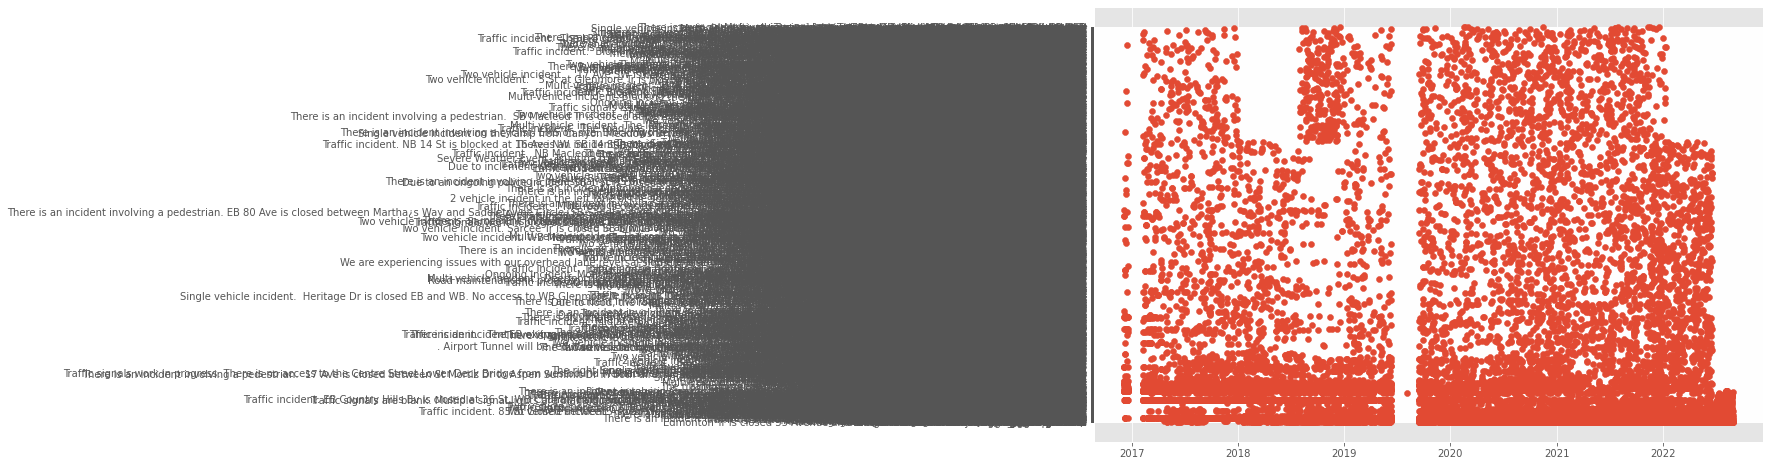

In [58]:
plt.scatter(x=df['DATE'], y=df['DESCRIPTION'])

plt.show()

# Plot appears meaningless. Need to use groupby function.

In [10]:
df

,INCIDENT INFO,DESCRIPTION,START_DT,TIME_CATEGORY,MODIFIED_DT,QUADRANT,Longitude,Latitude,Count,id,Point,DATE,TIME
0,9 Avenue and 16 Street SE,Traffic incident.,2022-06-20 17:15:00,Afternoon,6/20/2022 17:39,SE,-114.022138,51.036431,1,2022-06-20T17:15:5451.036430994532274-114.0221...,POINT (-114.02213851894481 51.036430994532274),2022-06-20,17:15:00
1,Northbound 14 Street and Memorial Drive NW,Traffic incident.,2022-06-20 17:37:00,Afternoon,6/20/2022 17:43,NW,-114.095939,51.049265,1,2022-06-20T17:37:5951.0492648619755-114.095938...,POINT (-114.09593875517233 51.0492648619755),2022-06-20,17:37:00
2,Southbound Deerfoot Trail and McKnight Boulev...,Two vehicle incident. Blocking the right lane,2022-07-14 14:08:00,Afternoon,7/14/2022 14:10,NW,-114.040891,51.096075,1,2022-07-14T14:08:1451.09607502612179-114.04089...,POINT (-114.04089121959574 51.09607502612179),2022-07-14,14:08:00
3,Westbound Country Hills Boulevard and Citadel...,Traffic incident.,2022-07-14 13:39:00,Afternoon,7/14/2022 14:39,NW,-114.172163,51.137425,1,2022-07-14T13:39:3651.13742477249295-114.17216...,POINT (-114.17216288422048 51.13742477249295),2022-07-14,13:39:00
4,130 Avenue and Tsuut'ina Trail SW,Traffic incident.,2022-06-20 17:27:00,Afternoon,6/20/2022 18:05,SW,-114.139663,50.936225,1,2022-06-20T17:27:4050.93622497228735-114.13966...,POINT (-114.13966287801772 50.93622497228735),2022-06-20,17:27:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33987,24 Avenue and McLaurin Street NW,Traffic signals are flashing red. Crews have b...,2020-01-20 09:38:00,Morning,Undefined,Undefined,-114.144539,51.074004,1,2020-01-20T09:38:0151.07400444955413-114.14453...,POINT (-114.1445387 51.07400445),2020-01-20,09:38:00
33988,Southland Drive and 24 Street SW,Traffic incident.,2021-02-21 12:24:00,Afternoon,Undefined,Undefined,-114.118531,50.961362,1,2021-02-21T12:24:0350.961362475800584-114.1185...,POINT (-114.1185313 50.96136248),2021-02-21,12:24:00
33989,52 Street and McKnight Boulevard NE,Two vehicle incident. Blocking the right lane,2020-09-25 16:22:00,Afternoon,Undefined,Undefined,-113.958265,51.096204,1,2020-09-25T16:22:5151.09620390924091-113.95826...,POINT (-113.9582648 51.09620391),2020-09-25,16:22:00
33990,Eastbound 16 Avenue and 36 Street NE,Traffic incident. Blocking the left shoulder,2022-06-20 16:43:00,Afternoon,6/20/2022 17:17,NE,-113.989219,51.067086,1,2022-06-20T16:43:2151.06708565896752-113.98921...,POINT (-113.98921905311566 51.06708565896752),2022-06-20,16:43:00


In [37]:
# Trying out groupby function 

import re

a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

a.groupby('DATE')['DESCRIPTION'].count()

DATE
2016-12-07    2
2016-12-08    2
2016-12-12    1
2016-12-16    1
2016-12-17    1
             ..
2022-08-21    1
2022-08-23    2
2022-08-24    1
2022-08-27    2
2022-08-29    1
Name: DESCRIPTION, Length: 827, dtype: int64

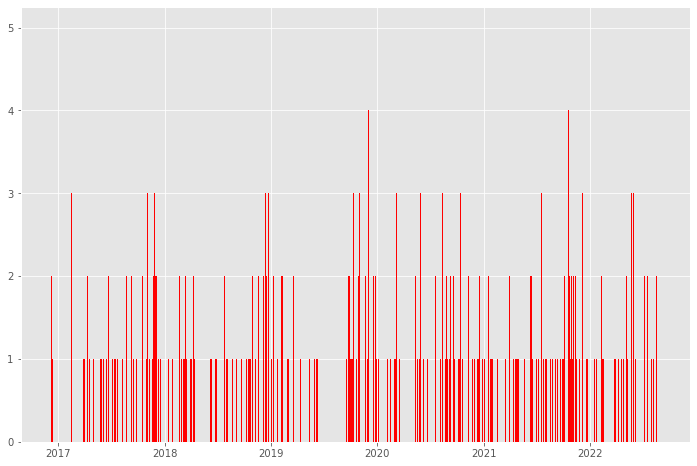

In [14]:
a = df[df.['DESCRIPTION'].str.contains('pedestrian',re.IGNORECASE)]

b = a.groupby('DATE')['DESCRIPTION'].count()

plt.bar(b.index, b.values, color = 'r')

plt.show()

In [38]:
import re

a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

a.groupby('TIME_CATEGORY')['DESCRIPTION'].count()

TIME_CATEGORY
Afternoon    448
Evening      334
Morning      388
Name: DESCRIPTION, dtype: int64

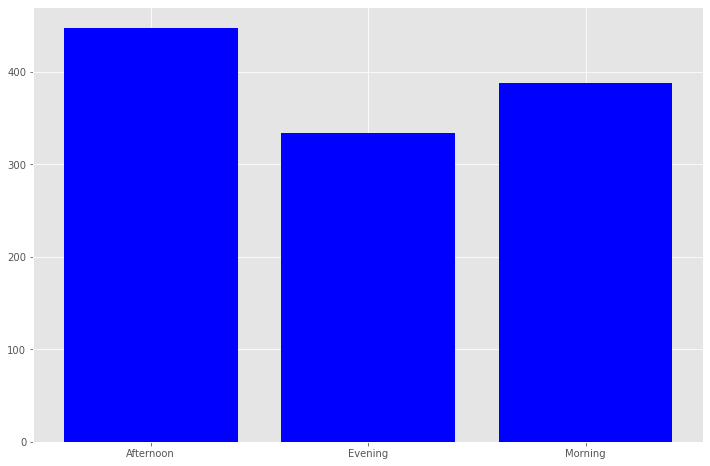

In [41]:
# Incidents involving pedestrians at different times of the day

a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

b = a.groupby('TIME_CATEGORY')['DESCRIPTION'].count()

plt.bar(b.index, b.values, color = 'b')

plt.show()

In [44]:
# Using groupby function on multiple columns

import re

a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

a.groupby(['TIME_CATEGORY','DATE'])['DESCRIPTION'].count()

TIME_CATEGORY  DATE      
Afternoon      2016-12-07    1
               2016-12-12    1
               2016-12-16    1
               2016-12-17    1
               2016-12-19    1
                            ..
Morning        2022-08-18    2
               2022-08-21    1
               2022-08-23    1
               2022-08-27    2
               2022-08-29    1
Name: DESCRIPTION, Length: 996, dtype: int64

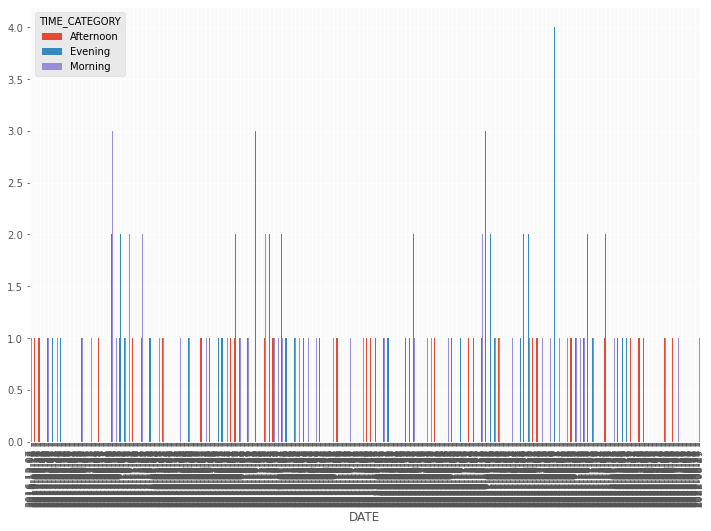

In [56]:
a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

b = a.groupby(['TIME_CATEGORY','DATE'])['DESCRIPTION'].count().unstack('TIME_CATEGORY').plot.bar()

# Need to find a better way of plotting multiple columns

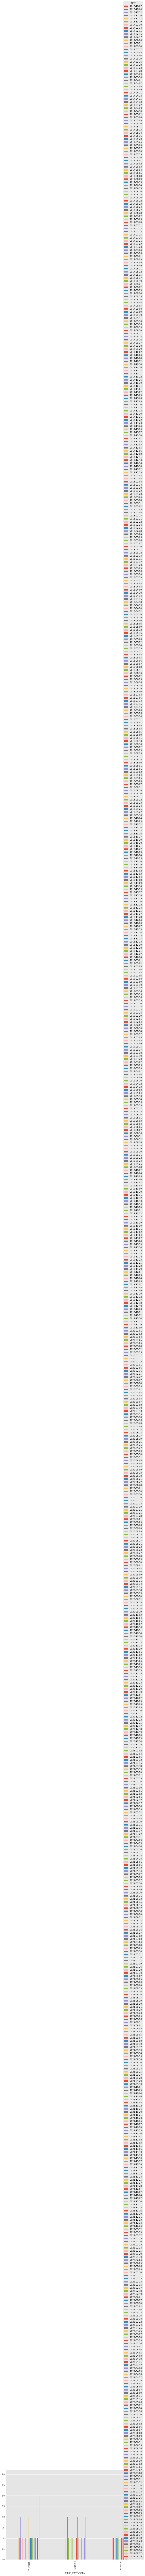

In [58]:
a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

b = a.groupby(['TIME_CATEGORY','DATE'])['DESCRIPTION'].count().unstack('DATE').plot.bar()


In [62]:
# incident involving multi vehicles

import re

a = df[df.DESCRIPTION.str.contains('multi',re.IGNORECASE)]

a.groupby('DATE')['DESCRIPTION'].count()

DATE
2017-02-23    1
2017-03-05    1
2017-05-22    1
2017-06-10    1
2017-07-13    1
             ..
2022-08-22    2
2022-08-23    1
2022-08-25    1
2022-08-27    1
2022-08-28    2
Name: DESCRIPTION, Length: 469, dtype: int64

In [63]:
import re

a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

a.groupby('QUADRANT')['DESCRIPTION'].count()

QUADRANT
NE           132
NW           163
SE           163
SW           219
Undefined    493
Name: DESCRIPTION, dtype: int64

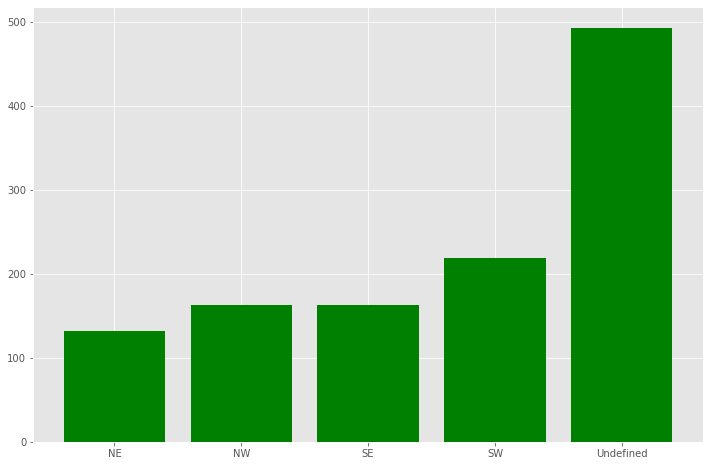

In [64]:
# Incident involving pedestrians at differnt quadrants of the city

a = df[df.DESCRIPTION.str.contains('pedestrian',re.IGNORECASE)]

b = a.groupby('QUADRANT')['DESCRIPTION'].count()

plt.bar(b.index, b.values, color = 'g')

plt.show()